# 유방암 환자 데이터셋을 활용한 지도학습 학습모델 평가

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터셋
- 유방암 환자 데이터셋(breast_cancer)

In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [54]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [55]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [57]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [58]:
# target_names : target 안에 있는 값들의 이름 (0,1의 이름)
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

#### DF 만들기

In [59]:
data = cancer["data"]
target = cancer["target"]
feature_names = cancer["feature_names"]

In [60]:
df = pd.DataFrame(data, columns = feature_names)
df["target"] = target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [61]:
df_pos = df.loc[df["target"] == 1] # 양성종양
df_neg = df.loc[df["target"]==0] # 악성종양

In [62]:
df_pos.shape

(357, 31)

In [63]:
df_neg.shape

(212, 31)

#### input 데이터 준비

In [64]:
X = df.drop("target", axis =1) # features
y = df["target"]                        # target

#### train,test 데이터 분할

In [65]:
# train_test_split(default : test_size = 0.25, shuffle = True)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 20, shuffle = True, stratify = y, test_size = 0.25)

#### 모델 생성 및 학습

In [66]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(max_depth = 5)
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

#### 모델 평가

In [67]:
y_pred = model_dtc.predict(X_test)
print(y_pred)
print((y_pred == y_test).mean())
print(model_dtc.score(X_test,y_test))
## 위에 2개의 정확도는 같은 것임


[1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0
 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1
 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1]
0.9370629370629371
0.9370629370629371


#### 성능 평가
##### 정확도
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score
- sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
##### classification_report
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report
- sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        53
           1       0.98      0.92      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.88      0.96      0.92        53
      benign       0.98      0.92      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



### 양성 환자 편향 데이터로 구성
- 극단적으로 데이터 표현
- 양성 환자 357개 + 악성 환자 5개

In [70]:
df_sample = pd.concat([df_pos,df_neg[:5]],sort = True)
df_sample

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
19,23.560,0.014600,0.013150,0.02387,0.002300,566.3,0.08129,0.047810,0.06664,0.05766,...,711.2,0.17730,0.12880,0.23900,0.07259,99.70,15.110,0.14400,0.2977,19.26
20,14.670,0.018980,0.006490,0.01698,0.002425,520.0,0.12700,0.031100,0.04568,0.06811,...,630.5,0.27760,0.07283,0.18900,0.08183,96.09,14.500,0.13120,0.3184,20.49
21,15.700,0.014320,0.014210,0.01985,0.002968,273.9,0.06492,0.020760,0.02956,0.06905,...,314.9,0.11480,0.06227,0.08867,0.07773,65.13,10.230,0.13240,0.2450,15.66
37,14.160,0.004899,0.011640,0.01343,0.001777,523.8,0.03766,0.029230,0.02562,0.05863,...,545.9,0.04619,0.05013,0.04833,0.06169,84.46,13.300,0.09701,0.1987,22.81
46,8.205,0.016460,0.005917,0.01588,0.002582,201.9,0.05943,0.005917,0.01588,0.06503,...,242.2,0.13570,0.02564,0.06880,0.07409,57.26,8.964,0.12970,0.3105,21.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,153.400,0.049040,0.015870,0.05373,0.006193,1001.0,0.27760,0.147100,0.30010,0.07871,...,2019.0,0.66560,0.26540,0.71190,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.080,0.013080,0.013400,0.01860,0.003532,1326.0,0.07864,0.070170,0.08690,0.05667,...,1956.0,0.18660,0.18600,0.24160,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.030,0.040060,0.020580,0.03832,0.004571,1203.0,0.15990,0.127900,0.19740,0.05999,...,1709.0,0.42450,0.24300,0.45040,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.230,0.074580,0.018670,0.05661,0.009208,386.1,0.28390,0.105200,0.24140,0.09744,...,567.7,0.86630,0.25750,0.68690,0.17300,98.87,14.910,0.20980,0.6638,26.50


In [71]:
X = df_sample.drop("target", axis  = 1)
y = df_sample.target

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 20, shuffle=True, stratify=y)

#### 모델 생성 및 모델 학습

In [73]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [74]:
y_pred = model_dtc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [75]:
(y_pred == y_test).mean()

0.989010989010989

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        90

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91



c:\Users\madda\.ssh\ml_scikit_learn\venv_mlskl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madda\.ssh\ml_scikit_learn\venv_mlskl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madda\.ssh\ml_scikit_learn\venv_mlskl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [77]:
# fconfusion_maxtrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 0,  1],
       [ 0, 90]], dtype=int64)

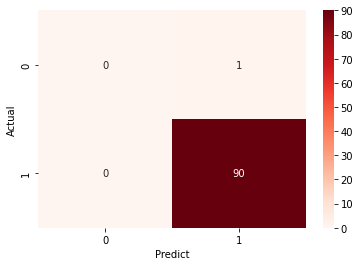

In [78]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cmap = "Reds")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

#### 정밀도 ,재현율, f1-score

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 정밀도 구하기
print(precision_score(y_test,y_pred))

# 맞춘 개수 / (맞춘 개수 + 틀린 개수)
print(90/91)

0.989010989010989
0.989010989010989


In [80]:
# 재현율 구하기
print(recall_score(y_test,y_pred))

# TP / (TP + FN)
print(90/90)

1.0
1.0


In [81]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred)
print('f1 스코어 : {0:.4f}'.format(f1))

f1 스코어 : 0.9945


In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      1.00      0.99        90

    accuracy                           0.99        91
   macro avg       0.49      0.50      0.50        91
weighted avg       0.98      0.99      0.98        91



c:\Users\madda\.ssh\ml_scikit_learn\venv_mlskl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madda\.ssh\ml_scikit_learn\venv_mlskl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\madda\.ssh\ml_scikit_learn\venv_mlskl\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

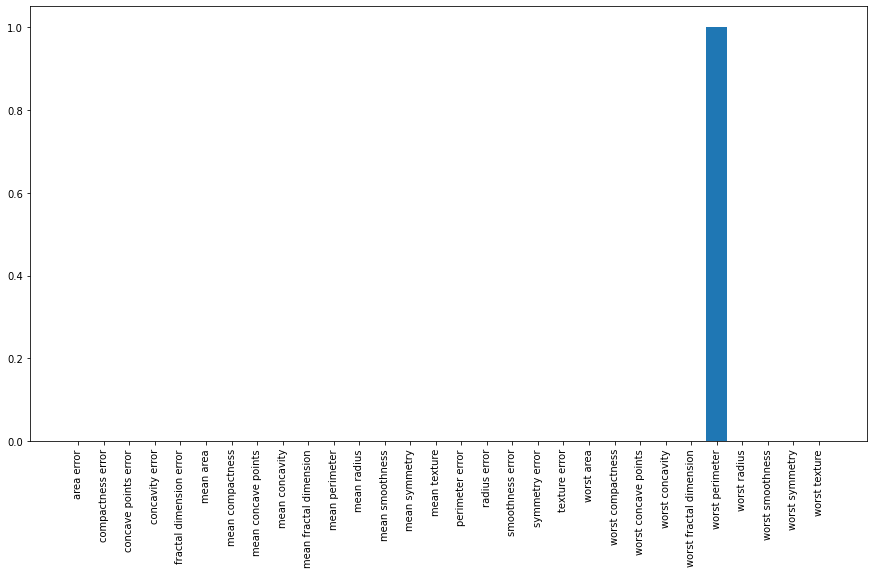

In [91]:
# 모델 학습 선능에 영향을 준 feature 확인하기
fig = plt.figure(figsize = (15,8))
plt.bar(X_train.columns,model_dtc.feature_importances_)
plt.xticks(rotation = 90)
plt.show()